In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
df = pd.read_csv("Major League Baseball no-hitters.csv")

In [64]:
df.head()

,date,game_number,winning_team,losing_team,winning_pitcher
0,18760715,140,NaN,NaN,NaN
1,18800612,1035,NaN,NaN,NaN
2,18800617,1046,NaN,NaN,NaN
3,18800819,1177,NaN,NaN,NaN
4,18800820,1179,NaN,NaN,NaN


In [65]:
df.tail()

,date,game_number,winning_team,losing_team,winning_pitcher
289,20150725,210250,PHI,CHN,Cole Hamels
290,20150812,210490,SEA,BAL,Hisashi Iwakuma
291,20150821,210610,HOU,LAN,Michael Fiers
292,20150830,210740,CHN,LAN,Jake Arrieta
293,20151003,211208,WAS,NYN,Max Scherzer


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   date             294 non-null    int64 
 1   game_number      294 non-null    int64 
 2   winning_team     228 non-null    object
 3   losing_team      228 non-null    object
 4   winning_pitcher  228 non-null    object
dtypes: int64(2), object(3)
memory usage: 11.6+ KB


In [67]:
df["date"] = df["date"].astype("string")

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   date             294 non-null    string
 1   game_number      294 non-null    int64 
 2   winning_team     228 non-null    object
 3   losing_team      228 non-null    object
 4   winning_pitcher  228 non-null    object
dtypes: int64(1), object(3), string(1)
memory usage: 11.6+ KB


In [69]:
df.dtypes

date               string
game_number         int64
winning_team       object
losing_team        object
winning_pitcher    object
dtype: object

In [70]:
df.columns

Index(['date', 'game_number', 'winning_team', 'losing_team',
       'winning_pitcher'],
      dtype='object')

In [71]:
df["year"] = df["date"].str[:4]

In [72]:
df["year"]

0      1876
1      1880
2      1880
3      1880
4      1880
       ... 
289    2015
290    2015
291    2015
292    2015
293    2015
Name: year, Length: 294, dtype: string

In [73]:
df["year"] = df["year"].astype(int)
df.dtypes

date               string
game_number         int64
winning_team       object
losing_team        object
winning_pitcher    object
year                int32
dtype: object

In [74]:
nohitter_times = df.loc[df["year"].between(1901,2015)]["game_number"]

In [75]:
nohitter_times

43      20279
44      21893
45      22995
46      23211
47      23896
        ...  
289    210250
290    210490
291    210610
292    210740
293    211208
Name: game_number, Length: 251, dtype: int64

# How often do we get no-hitters?

The number of games played between each no-hitter in the modern era (1901-2015) of Major League Baseball is stored in the array nohitter_times.

In [76]:
# Seed random number generator
np.random.seed(42)

In [77]:
# Compute mean no-hitter time: tau
tau = np.mean(nohitter_times)
tau

111637.54183266932

In [78]:
# Draw out of an exponential distribution with parameter tau: inter_nohitter_time
inter_nohitter_time = np.random.exponential(tau, 100000)

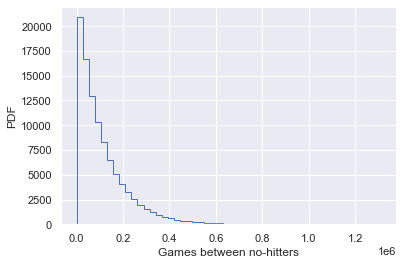

In [79]:
# Plot the PDF and label axes
sns.set()
plt.hist(inter_nohitter_time,
             bins = 50, histtype = "step")
plt.xlabel('Games between no-hitters')
plt.ylabel('PDF')


# Show the plot
plt.show()

# Do the data follow our story?

You have modeled no-hitters using an Exponential distribution. Create an ECDF of the real data. Overlay the theoretical CDF with the ECDF from the data. This helps you to verify that the Exponential distribution describes the observed data.

In [80]:
def ecdf(data):
    """Compute the number for a one-dimensional array of measurements"""
    
    # Number of data points
    n = len(data)
    
    # x-data for the ECDF: x
    x = np.sort(data)
    
    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n
    
    return x, y

In [81]:
# Create an ECDF from real data: x, y
x, y = ecdf(nohitter_times)

In [82]:
# Create a CDF from theoretical samples: x_theor, y_theor
x_theor, y_theor = ecdf(inter_nohitter_time)

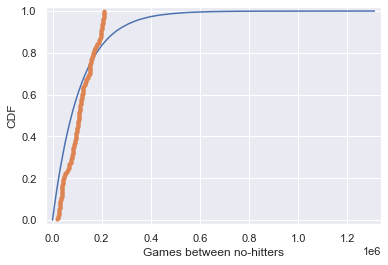

In [83]:
# Overlay the plots
plt.plot(x_theor, y_theor)
plt.plot(x, y, marker= ".", linestyle= "none")

# Margins and axis labels
plt.margins(0.02)
plt.xlabel('Games between no-hitters')
plt.ylabel('CDF')

plt.show()

# How is this parameter optimal?

Now sample out of an exponential distribution with  being twice as large as the optimal . Do it again for  half as large. Make CDFs of these samples and overlay them with your data. You can see that they do not reproduce the data as well. Thus, the  you computed from the mean inter-no-hitter times is optimal in that it best reproduces the data.

Text(0, 0.5, 'CDF')

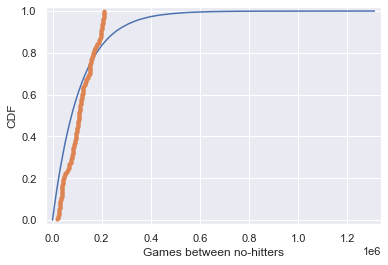

In [84]:
# Plot the theoretical CDFs
plt.plot(x_theor, y_theor)
plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
plt.xlabel('Games between no-hitters')
plt.ylabel('CDF')

In [85]:
# Take samples with half tau: samples_half
samples_half = np.random.exponential(tau/2,10000)

In [86]:
# Take samples with double tau: samples_double
samples_double = np.random.exponential(2*tau,10000)

In [87]:
# Generate CDFs from these samples
x_half, y_half = ecdf(samples_half)
x_double, y_double = ecdf(samples_double)

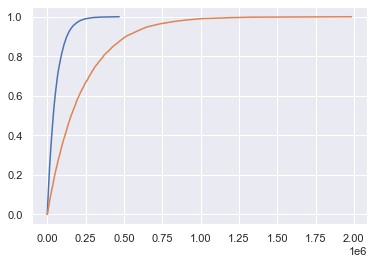

In [88]:
# Plot these CDFs as lines
plt.plot(x_half, y_half)
plt.plot(x_double, y_double)

plt.show()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

# EDA of literacy/fertility data

In the next few exercises, we will look at the correlation between female literacy and fertility (defined as the average number of children born per woman) throughout the world. For ease of analysis and interpretation, we will work with the illiteracy rate.

It is always a good idea to do some EDA ahead of our analysis. To this end, plot the fertility versus illiteracy and compute the Pearson correlation coefficient. The NumPy array illiteracy has the illiteracy rate among females for most of the world's nations. The array fertility has the corresponding fertility data.

In [89]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x,y)

    # Return entry [0,1]
    return corr_mat[0,1]

In [90]:
df2 = pd.read_excel("female_literacy_fertility.xlsx")

In [91]:
df2.head()

,Country,Continent,female literacy,fertility,population
0,Chine,ASI,90.5,1769.0,"1,324,655,000"
1,Inde,ASI,50.8,2682.0,"1,139,964,932"
2,USA,NAM,99.0,2077.0,"304,060,000"
3,IndonÃ©sie,ASI,88.8,2132.0,"227,345,082"
4,BrÃ©sil,LAT,90.2,1827.0,"191,971,506"


In [92]:
df2.tail()

,Country,Continent,female literacy,fertility,population
157,Vanuatu,OCE,79.5,3883.0,233.866
158,Samoa,OCE,98.5,3852.0,178.869
159,Sao TomÃ©-et-Principe,AF,83.3,3718.0,160.174
160,Aruba,LAT,98.0,1732.0,105.455
161,Tonga,ASI,99.1,3928.0,103.566


In [93]:
df2.columns

Index(['Country ', 'Continent', 'female literacy', 'fertility', 'population'], dtype='object')

In [94]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          162 non-null    object 
 1   Continent        162 non-null    object 
 2   female literacy  162 non-null    float64
 3   fertility        162 non-null    float64
 4   population       162 non-null    object 
dtypes: float64(2), object(3)
memory usage: 6.5+ KB


In [95]:
female_literacy = df2["female literacy"]
female_literacy

0      90.5
1      50.8
2      99.0
3      88.8
4      90.2
       ... 
157    79.5
158    98.5
159    83.3
160    98.0
161    99.1
Name: female literacy, Length: 162, dtype: float64

In [96]:
fertility = df2["fertility"]
fertility

0      1769.0
1      2682.0
2      2077.0
3      2132.0
4      1827.0
        ...  
157    3883.0
158    3852.0
159    3718.0
160    1732.0
161    3928.0
Name: fertility, Length: 162, dtype: float64

In [50]:
x = df2["female literacy"].values
type(x)

numpy.ndarray

In [51]:
y = df2["fertility"].values
type(y)

numpy.ndarray

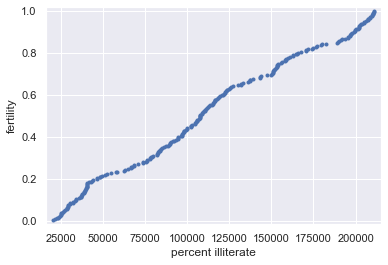

In [103]:
# Plot the illiteracy rate versus fertility
plt.plot(x ,y , marker = ".", linestyle = "none")

sns.set()
# Set the margins and label axes
plt.margins(0.02)
plt.xlabel('percent illiterate')
plt.ylabel('fertility')
plt.show()

In [105]:
# Show the Pearson correlation coefficient
print(pearson_r(y, x))

0.9947376375948381


In [106]:
# Perform a linear regression using np.polyfit(): a, b
a, b = np.polyfit(x,y,1)

In [107]:
# Print the results to the screen
print('slope =', a, 'children per woman / percent illiterate')
print('intercept =', b, 'children per woman')

slope = 5.047013724053722e-06 children per woman / percent illiterate
intercept = -0.06144417387659337 children per woman


In [116]:
# Make theoretical line to plot
x2 = np.array([0, 100])
y2 = a * x2 + b

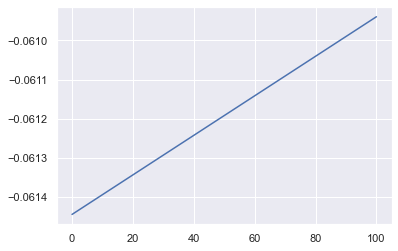

In [113]:
# Add regression line to your plot
plt.plot(x2,y2)
plt.show()

# How is it optimal?

The function np.polyfit() that you used to get your regression parameters finds the optimal slope and intercept. It is optimizing the sum of the squares of the residuals, also known as RSS (for residual sum of squares). In this exercise, you will plot the function that is being optimized, the RSS, versus the slope parameter a. To do this, fix the intercept to be what you found in the optimization. Then, plot the RSS versus the slope. Where is it minimal?

In [118]:
# Specify slopes to consider: a_vals
a_vals = np.linspace(0, 0.5, 100)

In [119]:
# Initialize sum of square of residuals: rss
rss = np.empty_like(a_vals)

In [121]:
# Compute sum of square of residuals for each value of a_vals
for i, a in enumerate(a_vals):
    rss[i] = np.sum((y - a*x - b)**2)

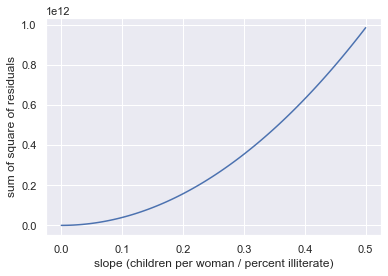

In [122]:
# Plot the RSS
plt.plot(a_vals, rss, '-')
plt.xlabel('slope (children per woman / percent illiterate)')
plt.ylabel('sum of square of residuals')

plt.show()

# Linear regression on appropriate Anscombe data

For practice, perform a linear regression on the data set from Anscombe's quartet that is most reasonably interpreted with linear regression.

In [124]:
anscombe = pd.read_csv("Anscombe.csv")
anscombe.head()

,0,0.1,1,1.1,2,2.1,3,3.1
0,x,y,x,y,x,y,x,y
1,10.0,8.04,10.0,9.14,10.0,7.46,8.0,6.58
2,8.0,6.95,8.0,8.14,8.0,6.77,8.0,5.76
3,13.0,7.58,13.0,8.74,13.0,12.74,8.0,7.71
4,9.0,8.81,9.0,8.77,9.0,7.11,8.0,8.84


In [125]:
anscombe.tail()

,0,0.1,1,1.1,2,2.1,3,3.1
7,6.0,7.24,6.0,6.13,6.0,6.08,8.0,5.25
8,4.0,4.26,4.0,3.10,4.0,5.39,19.0,12.50
9,12.0,10.84,12.0,9.13,12.0,8.15,8.0,5.56
10,7.0,4.82,7.0,7.26,7.0,6.42,8.0,7.91
11,5.0,5.68,5.0,4.74,5.0,5.73,8.0,6.89


In [132]:
x = anscombe[1:]["0"].values
x

array(['10.0', '8.0', '13.0', '9.0', '11.0', '14.0', '6.0', '4.0', '12.0',
       '7.0', '5.0'], dtype=object)

In [133]:
y = anscombe[1:]["0.1"].values
y

array(['8.04', '6.95', '7.58', '8.81', '8.33', '9.96', '7.24', '4.26',
       '10.84', '4.82', '5.68'], dtype=object)

In [136]:
# Perform linear regression: a, b
a, b = np.polyfit(x, y, 1)

TypeError: can only concatenate str (not "float") to str

In [137]:
# Print the slope and intercept
print(a, b)

0.5 -0.06144417387659337


In [143]:
# Generate theoretical x and y data: x_theor, y_theor
x_theor = np.array([3, 15])
y_theor = a * x_theor + b

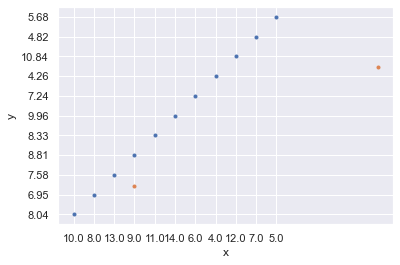

In [144]:
# Plot the Anscombe data and theoretical line
plt.plot(x, y, marker = ".", linestyle = "none")
plt.plot(x_theor, y_theor, marker = ".", linestyle = "none")

# Label the axes
plt.xlabel('x')
plt.ylabel('y')

plt.show()

In [145]:
# Iterate through x,y pairs
for x, y in zip(anscombe_x, anscombe_y):
    # Compute the slope and intercept: a, b
    a, b = np.polyfit(x, y, 1)

    # Print the result
    print('slope:', a, 'intercept:', b)

NameError: name 'anscombe_x' is not defined